### **Lesson: K-Means Clustering**  

Test

#### **Introduction to K-Means Clustering**  

#### **Key Concepts in K-Means Clustering** 

### **Steps in K-Means Algorithm**

#### **Example 1: Customer Segmentation Based on Spending Score**  
Let's say a shopping mall wants to group customers based on their annual income and spending habits.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


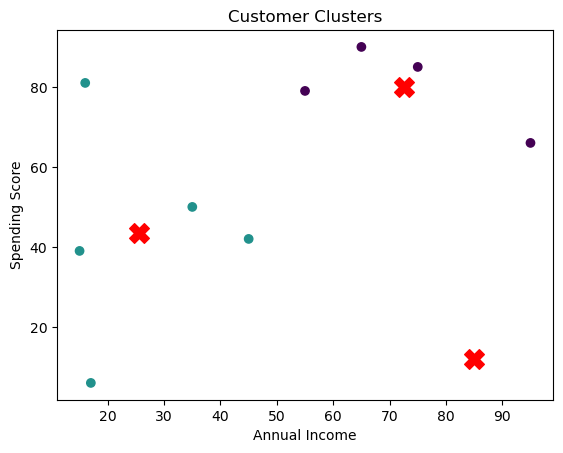

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data: Customer Income vs Spending Score
data = {'Annual_Income': [15, 16, 17, 35, 45, 55, 85, 95, 75, 65],
        'Spending_Score': [39, 81, 6, 50, 42, 79, 12, 66, 85, 90]}

df = pd.DataFrame(data)

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing clusters
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=200, c='red', marker='X')  # Centroids
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Clusters")
plt.show()


### **Real-Life Examples of K-Means Clustering**

1. **Customer Segmentation**  
   - Businesses use K-Means to group customers based on behavior (e.g., high spenders, budget buyers).  
2. **Image Compression**  
   - K-Means is used to reduce image colors by clustering similar pixel values.  
3. **Anomaly Detection in Banking**  
   - Banks use it to identify unusual transactions that could indicate fraud.  
4. **Grouping Documents**  
   - Search engines cluster similar articles or news reports together.  

### **Choosing the Optimal Number of Clusters (Elbow Method)**

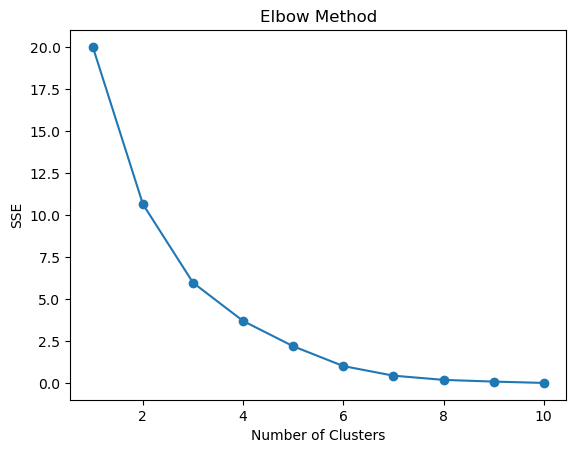

In [15]:

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


#### **Sum of Squared Errors (SSE) in K-Means Clustering**

#### **Definition of SSE**

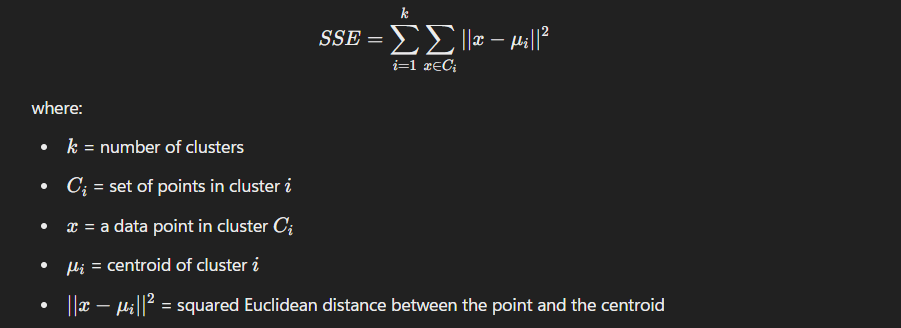

#### **Why is SSE Important?**

#### **How SSE Changes with \( k \)**

- As **\( k \) increases**, SSE **decreases**, because adding more clusters reduces the distance between points and their centroids.
- However, **too many clusters** can lead to **overfitting**, where each data point gets its own cluster, making SSE nearly zero but losing generalization.

#### **Elbow Method & SSE**

The **Elbow Method** is a popular technique to determine the best \( k \). It involves:
1. Running K-Means with different values of \( k \).
2. Plotting \( k \) vs. SSE.
3. Looking for the "elbow point," where the decrease in SSE slows down significantly.

#### **Python Implementation of SSE in K-Means**

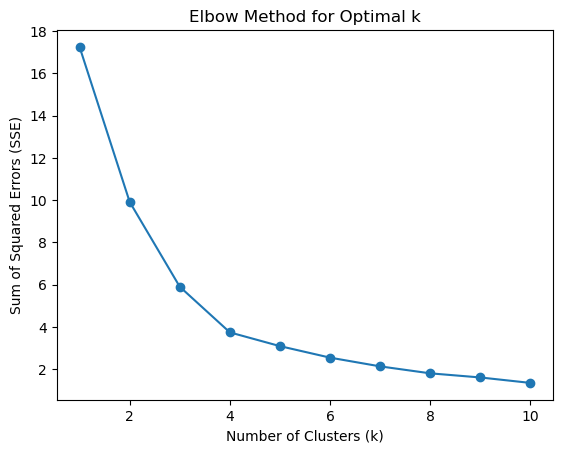

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample Data
X = np.random.rand(100, 2)

# Try different values of k
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_ gives SSE

# Plot the Elbow Method
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

#### **Key Takeaways**
✅ **SSE measures clustering quality**—lower SSE means better clustering.  
✅ **It decreases as \( k \) increases**, but too many clusters cause overfitting.  
✅ **The Elbow Method** helps find the best \( k \) by looking for the "bend" in the SSE curve.  
✅ **SSE is not the only metric**—other methods like **Silhouette Score** and **DBI (Davies-Bouldin Index)** can also help evaluate clustering quality.

### **Limitations of K-Means**

### **Conclusion**`